# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data.

## 3.1 Default of Credit Card Clients (Taiwan) dataset (https://doi.org/10.24432/C55S3H)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
DefaultCreditCard = pd.read_excel("default_of_credit_card_clients.xls", header=1, engine='xlrd')
DefaultCreditCard.rename(columns={"default payment next month": "default"}, inplace=True)

In [3]:
DefaultCreditCard.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
DefaultCreditCard = DefaultCreditCard.drop("ID",axis=1)

In [5]:
DefaultCreditCard.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
DefaultCreditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [7]:
DefaultCreditCard.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
print("\nColumn information:")
print(DefaultCreditCard.dtypes)


Column information:
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object


In [9]:
columns = DefaultCreditCard.columns.to_list()
columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default']

In [10]:
DefaultCreditCard.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
default          2
dtype: int64

In [11]:
DefaultCreditCard.duplicated().sum()

35

In [12]:
DefaultCreditCard[DefaultCreditCard.duplicated()][:5]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
1980,150000,2,1,1,38,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4585,150000,2,1,1,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6022,210000,2,1,2,39,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
6466,210000,2,2,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
7319,500000,1,1,1,43,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [13]:
DefaultCreditCard= DefaultCreditCard.drop_duplicates()
DefaultCreditCard.duplicated().sum()

0

In [14]:
DefaultCreditCard.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [15]:
DefaultCreditCard.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

### There are no missing (null) values in this dataset.

In [16]:
numeric_columns = DefaultCreditCard.select_dtypes(include='number').columns.tolist()
summary_columns = {
    "mean": DefaultCreditCard[numeric_columns].mean(),
    "median": DefaultCreditCard[numeric_columns].median(),
    "mode": DefaultCreditCard[numeric_columns].mode().iloc[0]
}

summary_df = pd.DataFrame(summary_columns).T
summary_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
mean,167442.005006,1.603738,1.853629,1.551877,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,...,43313.329885,40358.33439,38917.012281,5670.099316,5927.98318,5231.688837,4831.617454,4804.897047,5221.498014,0.221258
median,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19081.000000,18130.00000,17124.000000,2102.000000,2010.00000,1804.000000,1500.000000,1500.000000,1500.000000,0.000000
mode,50000.000000,2.000000,2.000000,2.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
DefaultCreditCard['default'].unique()

array([1, 0])

In [18]:
num_default = DefaultCreditCard[DefaultCreditCard['default'] == 1].shape[0]
num_good = DefaultCreditCard[DefaultCreditCard['default'] == 0].shape[0]
print(f"Number of defaulting clients: {num_default} - Number of good clients: {num_good}")
print(f"This dataset is imbalanced with a defaulting class making up only {num_default/30000:.2%} of the dataset")

Number of defaulting clients: 6630 - Number of good clients: 23335
This dataset is imbalanced with a defaulting class making up only 22.10% of the dataset


In [19]:
# Looking for outliers in Age Column

low_percentile = DefaultCreditCard['AGE'].quantile(0.025)
outliers_low = DefaultCreditCard[(DefaultCreditCard['AGE'] < low_percentile)]
outliers_low

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
37,60000,2,2,2,22,0,0,0,0,0,...,6026,-28335,18660,1500,1518,2043,0,47671,617,0
42,10000,1,2,2,22,0,0,0,0,0,...,3576,3670,4451,1500,2927,1000,300,1000,500,0
46,20000,2,1,2,22,0,0,2,-1,0,...,16341,16675,0,3000,0,16741,334,0,0,1
69,20000,1,5,2,22,2,0,0,0,0,...,18085,11205,5982,0,1200,1000,500,1000,0,0
78,30000,2,2,2,22,0,0,0,0,0,...,28004,26446,6411,1686,1400,560,3000,1765,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29202,10000,1,3,3,22,0,0,0,0,0,...,9768,9233,9154,1288,1400,1200,300,800,500,1
29210,20000,1,2,2,22,1,2,2,2,0,...,19850,20277,17525,2000,1300,0,702,620,0,1
29211,50000,1,2,2,22,0,0,0,0,-1,...,20480,9413,9712,3000,2650,2100,10000,600,500,0
29226,20000,1,2,2,22,0,0,0,0,0,...,7382,7375,7531,1245,1265,1271,264,275,900,0


In [20]:
# Looking for outliers in Age Column

high_percentile = DefaultCreditCard['AGE'].quantile(0.975)
outliers_high = DefaultCreditCard[(DefaultCreditCard['AGE'] > high_percentile)]
outliers_high

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
34,500000,1,1,1,58,-2,-2,-2,-2,-2,...,3180,0,5293,5006,31178,3180,0,5293,768,0
65,200000,1,1,1,57,-2,-2,-2,-1,2,...,8174,8198,7918,0,0,8222,300,0,1000,1
102,480000,1,1,1,63,0,0,0,2,2,...,487066,471145,469961,16078,55693,17000,0,18000,24200,0
149,260000,2,1,1,60,1,-2,-1,-1,-1,...,0,969,869,0,22500,0,969,1000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,150000,2,3,2,58,2,0,0,0,0,...,98302,69424,70906,6251,5000,3903,2500,2600,2600,0
29178,90000,2,3,2,60,-1,-1,-1,0,0,...,27878,27243,27799,63201,5322,26400,545,556,1274,0
29179,500000,2,2,1,73,-2,-2,-2,-2,-2,...,2835,8896,3850,2826,2652,2835,8896,3850,711,1
29180,140000,2,2,1,60,2,2,0,0,0,...,114789,115590,118221,0,5600,6000,4200,4500,4600,1


In [21]:
# Looking for outliers in Balance Column

Limit_balance = DefaultCreditCard["LIMIT_BAL"].value_counts(sort="ascending")
Limit_balance

LIMIT_BAL
50000      3363
20000      1975
30000      1610
80000      1564
200000     1524
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: count, Length: 81, dtype: int64

In [22]:
# Looking for outliers in Balance Column

high_percentile_balance = DefaultCreditCard['LIMIT_BAL'].quantile(0.975)
outliers_high_balance = DefaultCreditCard[(DefaultCreditCard['LIMIT_BAL'] > high_percentile_balance)]
outliers_high_balance

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
12,630000,2,2,2,41,-1,0,-1,-1,-1,...,6500,6500,2870,1000,6500,6500,6500,2870,0,0
260,510000,2,1,2,29,0,0,0,0,0,...,103776,87265,36739,40010,20094,5000,5001,25365,65000,0
433,580000,2,1,1,36,0,0,0,0,0,...,169365,168755,167964,6422,6565,5951,6006,5894,5946,0
451,600000,1,1,1,53,2,2,0,0,0,...,447130,440982,434715,0,18000,16000,16000,21000,20000,1
527,620000,2,2,1,45,2,2,0,0,0,...,163781,167159,170894,0,6200,6000,6000,6500,6000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29571,570000,1,1,2,33,0,0,0,0,0,...,266800,0,0,9083,11472,12000,0,0,0,0
29740,620000,1,2,2,31,-2,-2,-2,-2,-2,...,13846,3565,7076,11881,21171,13915,3583,7111,1971,0
29861,650000,1,1,1,44,-2,-2,-2,-2,-2,...,7139,1034,2127,5115,5180,7201,1035,2139,3463,0
29886,630000,1,2,1,46,0,0,0,0,0,...,146005,146207,106467,3416,4300,84700,4211,4470,3600,0


### This dataset does not contain any categorical data that needs to be one-hot encoded, as all features are in numeric form, as demonstrated by the histograms below. Each column in the dataset has its own histogram, and no columns are missing.


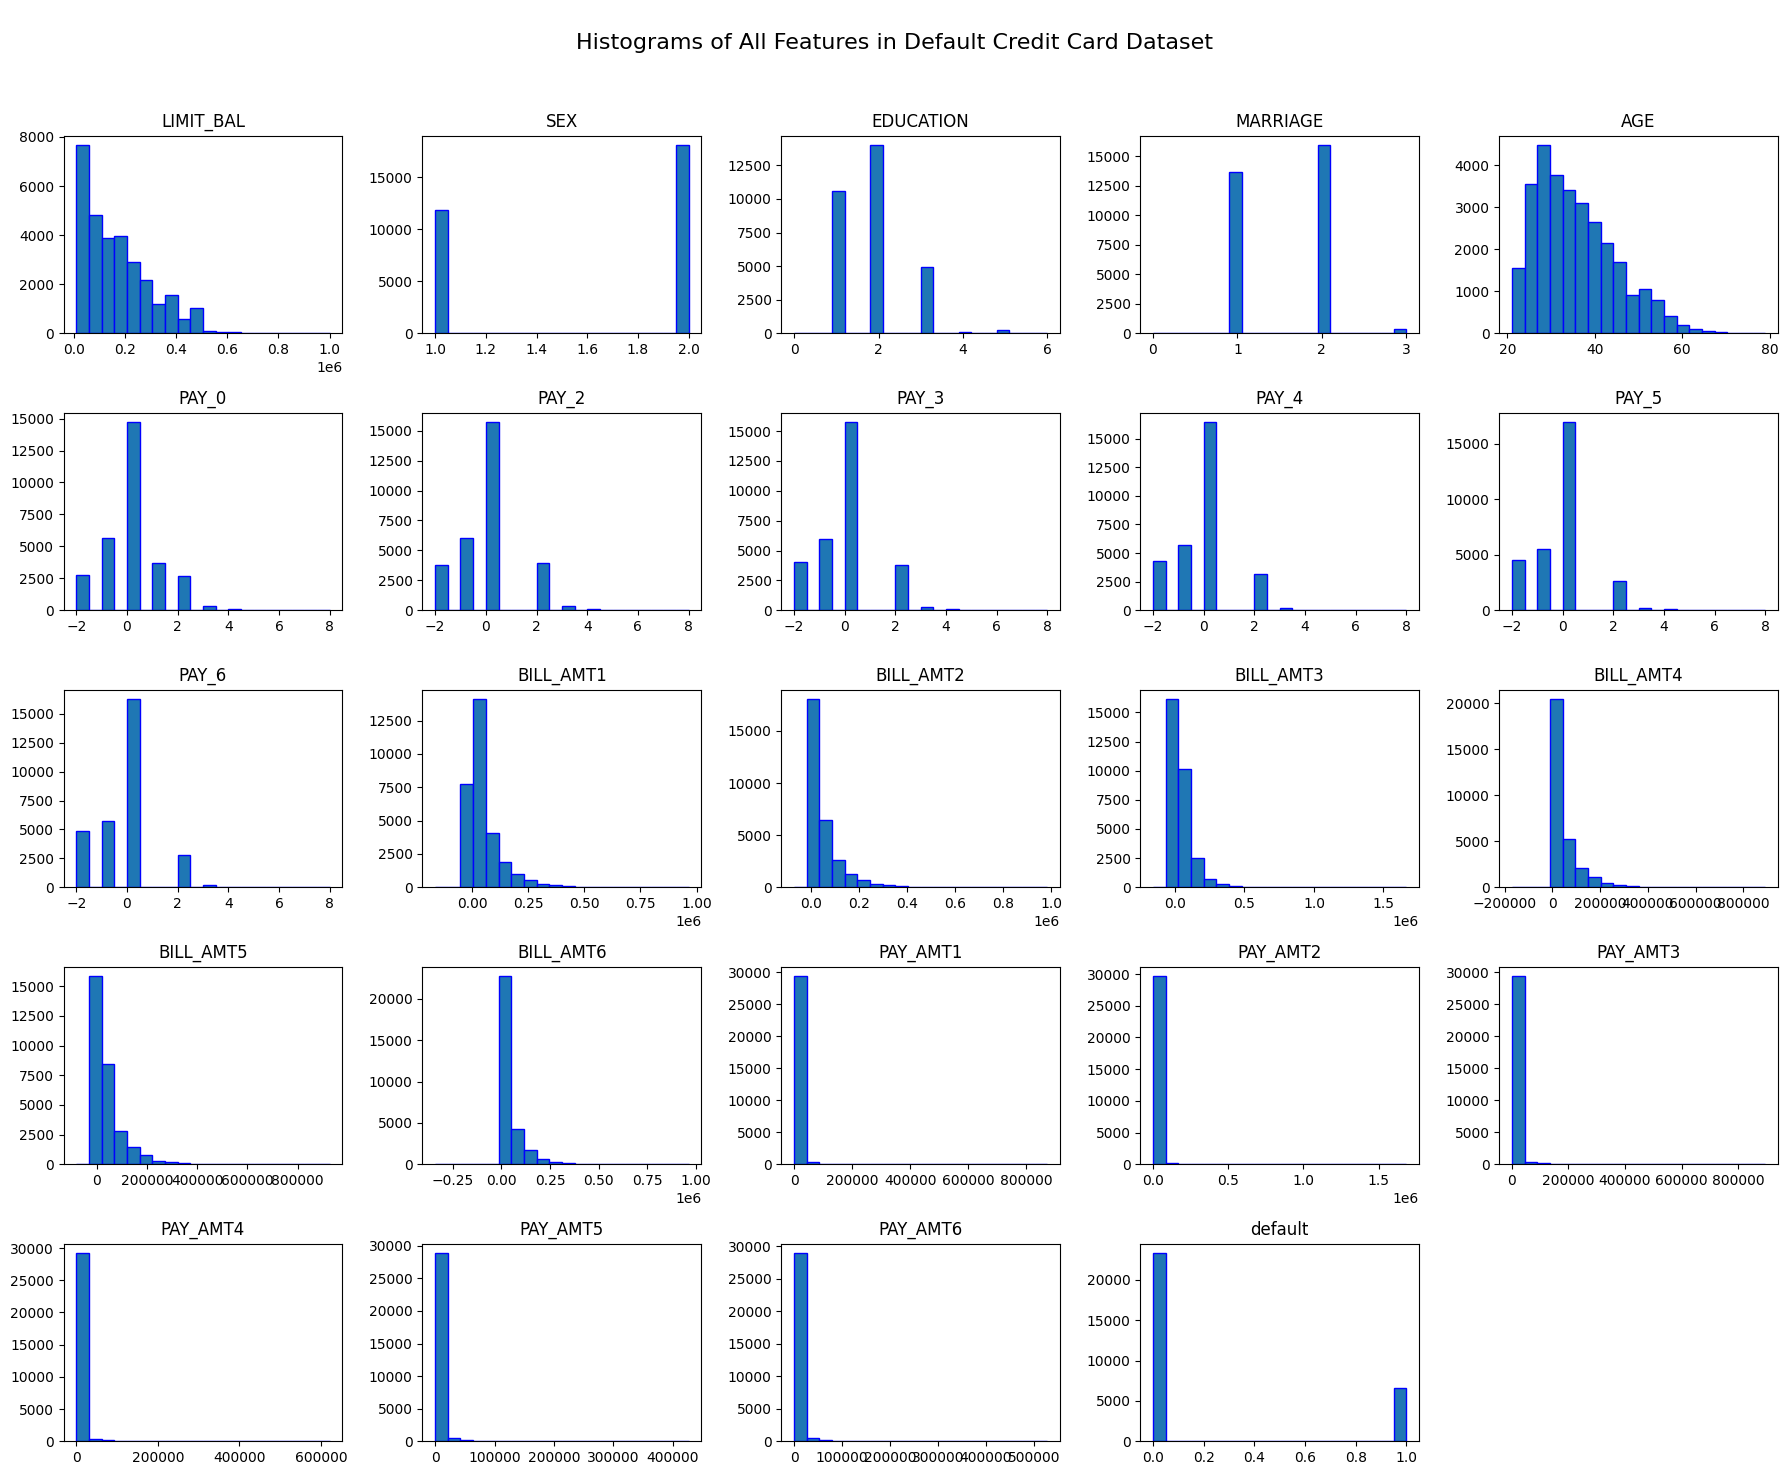

In [23]:
import matplotlib.pyplot as plt 

fig = DefaultCreditCard.hist(bins=20, figsize=(18, 15), layout=(5, 5), grid=False, edgecolor='b')
plt.suptitle("\nHistograms of All Features in Default Credit Card Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


## Conclusions:

- Are the data usable?  Yes, this dataset is usable. The data is clean—it contains no null or NaN values, and duplicate entries have been removed.

- Do you need to modify or correct the data in some way? At this point, there is no need to correct the data. However, the dataset is imbalanced.

- Is there any class imbalance? Yes, there is a significant class imbalance in the target column (default). There are 6,630 defaulting clients and 23,335 non-defaulting (good) clients. This means the defaulting class represents only 22.10% of the dataset, which could pose challenges during the modeling process.

## 3.2 German Credit Card dataset (https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)

In [24]:
from ucimlrepo import fetch_ucirepo 
  
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
print(statlog_german_credit_data.metadata) 
print(statlog_german_credit_data.variables) 

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [25]:

variables_info = pd.DataFrame(statlog_german_credit_data.variables)
variables_info


,name,role,type,demographic,description,units,missing_values
0,Attribute1,Feature,Categorical,None,Status of existing checking account,None,no
1,Attribute2,Feature,Integer,None,Duration,months,no
2,Attribute3,Feature,Categorical,None,Credit history,None,no
3,Attribute4,Feature,Categorical,None,Purpose,None,no
4,Attribute5,Feature,Integer,None,Credit amount,None,no
5,Attribute6,Feature,Categorical,None,Savings account/bonds,None,no
6,Attribute7,Feature,Categorical,Other,Present employment since,None,no
7,Attribute8,Feature,Integer,None,Installment rate in percentage of disposable i...,None,no
8,Attribute9,Feature,Categorical,Marital Status,Personal status and sex,None,no
9,Attribute10,Feature,Categorical,None,Other debtors / guarantors,None,no


In [26]:
X = pd.DataFrame(statlog_german_credit_data.data.features)
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [27]:
rename_dict = dict(zip(variables_info['name'], variables_info['description']))
X_renamed = X.rename(columns=rename_dict)
X_renamed.head(3)

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201


In [28]:
import json
with open("code_mappings.json", "r", encoding="utf-8") as f:
    code_mappings_loaded = json.load(f)


X_clear = X_renamed.copy()

for col, mapping in code_mappings_loaded.items():
    if col in X_clear.columns:
        X_clear[col] = X_clear[col].map(mapping)

In [29]:
X_clear.head()

,Status of existing checking account,Duration,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,< 0 DM,6,critical account / other credits elsewhere,radio/television,1169,unknown / no savings,>= 7 years,4,male: single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under customer’s name",yes
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female: divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,no checking account,12,critical account / other credits elsewhere,education,2096,< 100 DM,4 <= ... < 7 years,2,male: single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male: single,guarantor,4,building society / life insurance,45,none,for free,1,skilled employee / official,2,none,yes
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male: single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [30]:
y.head(3)

,class
0,1
1,2
2,1


In [31]:
y["class"].unique() # according to the word document coming with this set 1: " good class" and 2:"bad class"

array([1, 2])

In [32]:
y = y.replace({1: 0, 2: 1})
y = y.rename(columns={"class": "target"})
y.head()

,target
0,0
1,1
2,0
3,0
4,1


In [33]:
X_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration                                                  1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [34]:
X_clear.nunique()

Status of existing checking account                           4
Duration                                                     33
Credit history                                                5
Purpose                                                      10
Credit amount                                               921
Savings account/bonds                                         5
Present employment since                                      5
Installment rate in percentage of disposable income           4
Personal status and sex                                       4
Other debtors / guarantors                                    3
Present residence since                                       4
Property                                                      4
Age                                                          53
Other installment plans                                       3
Housing                                                       3
Number of existing credits at this bank 

### There are many complex categorical (nominal) features (13) in this dataset. Let's examine how many unique categories each of these features contains.

In [35]:
columns = X_clear.columns.to_list()

for col in columns:
    if X_clear[col].dtype == object:
        print(f"{col}:{X_clear[col].unique().shape[0]}")
      

Status of existing checking account:4
Credit history:5
Purpose:10
Savings account/bonds:5
Present employment since:5
Personal status and sex:4
Other debtors / guarantors:3
Property:4
Other installment plans:3
Housing:3
Job:4
Telephone:2
foreign worker:2


### Let's encode the categorical features. I'll first use OrdinalEncoder on the features with hierarchical categories, and then apply one-hot encoding to the remaining categorical features.

In [36]:
categorical_features = X_clear.select_dtypes(exclude=['number']).columns.tolist()
numeric_features     = X_clear.select_dtypes(include=['number']).columns.tolist()

X_clear[categorical_features].head(3)

,Status of existing checking account,Credit history,Purpose,Savings account/bonds,Present employment since,Personal status and sex,Other debtors / guarantors,Property,Other installment plans,Housing,Job,Telephone,foreign worker
0,< 0 DM,critical account / other credits elsewhere,radio/television,unknown / no savings,>= 7 years,male: single,none,real estate,none,own,skilled employee / official,"yes, registered under customer’s name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,radio/television,< 100 DM,1 <= ... < 4 years,female: divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account / other credits elsewhere,education,< 100 DM,4 <= ... < 7 years,male: single,none,real estate,none,own,unskilled - resident,none,yes


### I have identified the following features as hierarchical: "Status of existing checking account", "Credit history", "Savings account/bonds"

In [37]:
hierarchical_features = ["Status of existing checking account", "Credit history", "Savings account/bonds"]

In [38]:
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()
X_cat_h = X_clear[hierarchical_features]
columns = X_cat_h.columns
index = X_cat_h.index

X_cat_h_array = ordinal_encoder.fit_transform(X_cat_h)
X_cat_h = pd.DataFrame(X_cat_h_array, columns=columns, index=index)

X_cat_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Status of existing checking account  1000 non-null   float64
 1   Credit history                       1000 non-null   float64
 2   Savings account/bonds                1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [39]:
X_cat_h.head()

,Status of existing checking account,Credit history,Savings account/bonds
0,1.0,1.0,4.0
1,0.0,3.0,2.0
2,3.0,1.0,2.0
3,1.0,3.0,2.0
4,1.0,2.0,2.0


In [40]:
X_non_hierarchical = X_clear.drop(columns=hierarchical_features)
non_hierarchical_features = X_clear.select_dtypes(include=['object', 'category']).drop(columns=hierarchical_features).columns.tolist()

X_clear_onht = pd.get_dummies(X_non_hierarchical, columns=non_hierarchical_features, drop_first=False).astype(int)
X_clear_onht.iloc[:5,:]

,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Purpose_business,Purpose_car (new),Purpose_car (used),...,Housing_own,Housing_rent,Job_management / self-employed / highly qualified,Job_skilled employee / official,Job_unemployed / unskilled - non-resident,Job_unskilled - resident,Telephone_none,"Telephone_yes, registered under customer’s name",foreign worker_no,foreign worker_yes
0,6,1169,4,4,67,2,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [41]:
df_final = pd.concat((X_cat_h, X_clear_onht,y), axis=1)

In [42]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Status of existing checking account                         1000 non-null   float64
 1   Credit history                                              1000 non-null   float64
 2   Savings account/bonds                                       1000 non-null   float64
 3   Duration                                                    1000 non-null   int64  
 4   Credit amount                                               1000 non-null   int64  
 5   Installment rate in percentage of disposable income         1000 non-null   int64  
 6   Present residence since                                     1000 non-null   int64  
 7   Age                                                         1000 non-null   int64  
 8  

In [43]:
df_final.head()

,Status of existing checking account,Credit history,Savings account/bonds,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,...,Housing_rent,Job_management / self-employed / highly qualified,Job_skilled employee / official,Job_unemployed / unskilled - non-resident,Job_unskilled - resident,Telephone_none,"Telephone_yes, registered under customer’s name",foreign worker_no,foreign worker_yes,target
0,1.0,1.0,4.0,6,1169,4,4,67,2,1,...,0,0,1,0,0,0,1,0,1,0
1,0.0,3.0,2.0,48,5951,2,2,22,1,1,...,0,0,1,0,0,1,0,0,1,1
2,3.0,1.0,2.0,12,2096,2,3,49,1,2,...,0,0,0,0,1,1,0,0,1,0
3,1.0,3.0,2.0,42,7882,2,4,45,1,2,...,0,0,1,0,0,1,0,0,1,0
4,1.0,2.0,2.0,24,4870,3,4,53,2,2,...,0,0,1,0,0,1,0,0,1,1


In [44]:
df_final.describe()

,Status of existing checking account,Credit history,Savings account/bonds,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,...,Housing_rent,Job_management / self-employed / highly qualified,Job_skilled employee / official,Job_unemployed / unskilled - non-resident,Job_unskilled - resident,Telephone_none,"Telephone_yes, registered under customer’s name",foreign worker_no,foreign worker_yes,target
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.582000,2.219000,2.1450,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,...,0.179000,0.148000,0.630000,0.022000,0.2000,0.596000,0.404000,0.037000,0.963000,0.300000
std,1.253334,1.064035,1.1114,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,...,0.383544,0.355278,0.483046,0.146757,0.4002,0.490943,0.490943,0.188856,0.188856,0.458487
min,0.000000,0.000000,0.0000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.0000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,2.0000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,3.000000,2.0000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.0000,1.000000,1.000000,0.000000,1.000000,1.000000
max,3.000000,4.000000,4.0000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_final.isnull().sum().sum()

0

In [46]:
df_final.isna().sum().sum()

0

In [47]:
df_final.duplicated().sum()

0

In [48]:
numeric_columns = df_final.select_dtypes(include='number').columns.tolist()
summary_columns = {
    "mean": df_final[numeric_columns].mean(),
    "median": df_final[numeric_columns].median(),
    "mode": df_final[numeric_columns].mode().iloc[0]
}

summary_df = pd.DataFrame(summary_columns).T
summary_df

,Status of existing checking account,Credit history,Savings account/bonds,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,...,Housing_rent,Job_management / self-employed / highly qualified,Job_skilled employee / official,Job_unemployed / unskilled - non-resident,Job_unskilled - resident,Telephone_none,"Telephone_yes, registered under customer’s name",foreign worker_no,foreign worker_yes,target
mean,1.582,2.219,2.145,20.903,3271.258,2.973,2.845,35.546,1.407,1.155,...,0.179,0.148,0.63,0.022,0.2,0.596,0.404,0.037,0.963,0.3
median,1.000,3.000,2.000,18.000,2319.500,3.000,3.000,33.000,1.000,1.000,...,0.000,0.000,1.00,0.000,0.0,1.000,0.000,0.000,1.000,0.0
mode,3.000,3.000,2.000,24.000,1258.000,4.000,4.000,27.000,1.000,1.000,...,0.000,0.000,1.00,0.000,0.0,1.000,0.000,0.000,1.000,0.0


In [49]:
low_percentile = df_final['Age'].quantile(0.025)
outliers_low = df_final[(df_final['Age'] < low_percentile)]
print(f"total_numbers of outliers by Age (below 2.5 percentile):{outliers_low.shape[0]}")
outliers_low.head()

total_numbers of outliers by Age (below 2.5 percentile):16


,Status of existing checking account,Credit history,Savings account/bonds,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,...,Housing_rent,Job_management / self-employed / highly qualified,Job_skilled employee / official,Job_unemployed / unskilled - non-resident,Job_unskilled - resident,Telephone_none,"Telephone_yes, registered under customer’s name",foreign worker_no,foreign worker_yes,target
93,2.0,1.0,4.0,24,3617,4,4,20,2,1,...,1,0,1,0,0,1,0,0,1,0
155,1.0,3.0,2.0,12,1282,2,4,20,1,1,...,1,0,1,0,0,1,0,0,1,1
167,0.0,3.0,3.0,11,1577,4,1,20,1,1,...,0,0,1,0,0,1,0,0,1,0
188,1.0,3.0,0.0,12,674,4,1,20,1,1,...,0,0,1,0,0,1,0,0,1,1
296,3.0,3.0,4.0,12,4675,1,4,20,1,1,...,1,0,1,0,0,1,0,0,1,0


In [50]:
high_percentile = df_final['Age'].quantile(0.975)
outliers_high = df_final[(df_final['Age'] > high_percentile)]
print(f"total_numbers of outliers by Age (higher than 97.5 percentile):{outliers_high.shape[0]}")
outliers_high.head()

total_numbers of outliers by Age (higher than 97.5 percentile):23


,Status of existing checking account,Credit history,Savings account/bonds,Duration,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,...,Housing_rent,Job_management / self-employed / highly qualified,Job_skilled employee / official,Job_unemployed / unskilled - non-resident,Job_unskilled - resident,Telephone_none,"Telephone_yes, registered under customer’s name",foreign worker_no,foreign worker_yes,target
0,1.0,1.0,4.0,6,1169,4,4,67,2,1,...,0,0,1,0,0,0,1,0,1,0
75,1.0,1.0,2.0,12,1526,4,4,66,2,1,...,0,1,0,0,0,1,0,0,1,0
137,0.0,3.0,1.0,12,766,4,3,66,1,1,...,0,0,0,0,1,1,0,0,1,1
163,0.0,3.0,2.0,10,7308,2,4,70,1,1,...,0,1,0,0,0,0,1,0,1,0
179,1.0,1.0,2.0,21,571,4,4,65,2,1,...,0,0,1,0,0,1,0,0,1,0


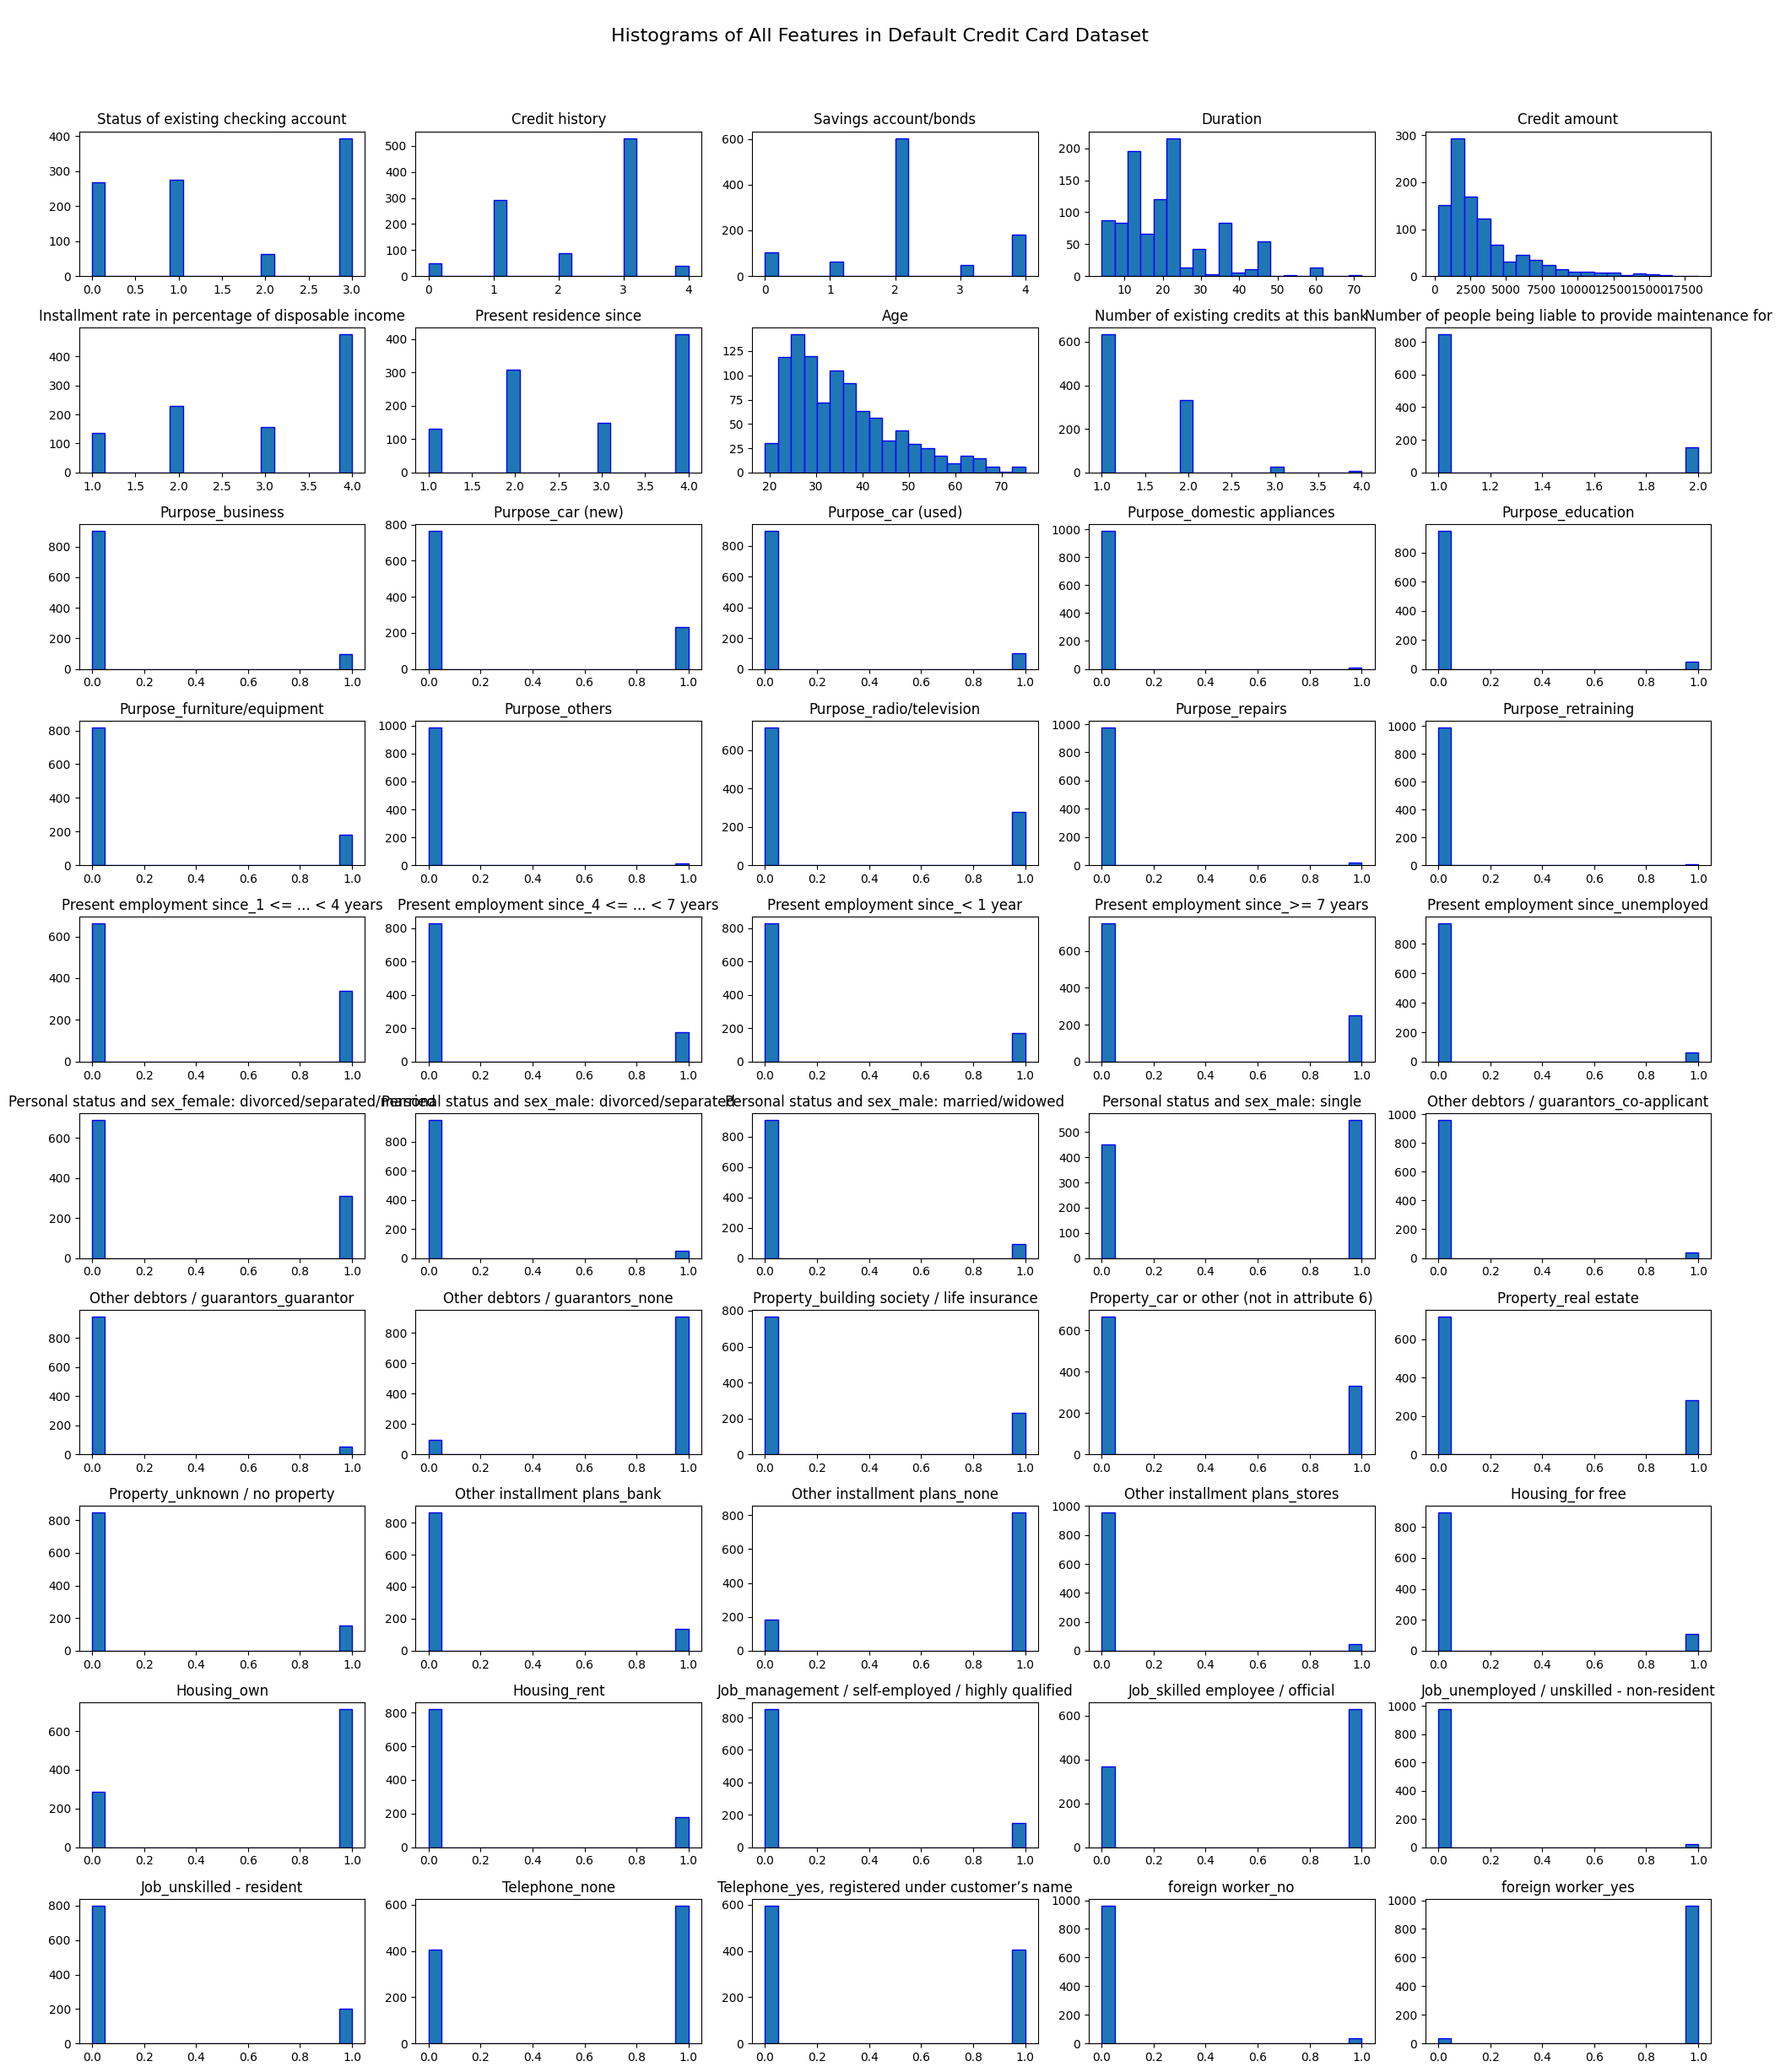

In [51]:
fig = df_final.iloc[:,:-1].hist(bins=20, figsize=(20, 25), layout=(10, 5), grid=False, edgecolor='b')
plt.suptitle("\nHistograms of All Features in Default Credit Card Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # adjusts layout to fit title
plt.show()

## 3.3 Loan Default dataset (https://www.kaggle.com/datasets/marcbuji/loan-default-prediction)

In [52]:
file_path = "Loan_default_prediction_data_train.csv"
None

loan_default = pd.read_csv(file_path)

In [53]:
loan_default.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [54]:
loan_default.describe()

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,87500.000000,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [55]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        81925 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt_to_Income       84011 non-null  float64
 11  Postal_Code          86111 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usage_Rate           87500 non-null 

In [56]:
loan_default.isna().sum().sum()


20905

In [57]:
loan_default.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly_Income          5575
Home_Status               0
Unpaid_2_years            0
Already_Defaulted         0
Designation            1414
Debt_to_Income         3489
Postal_Code            1389
Lend_Amount               0
Deprecatory_Records       0
Interest_Charged          0
Usage_Rate                0
Inquiries                 0
Present_Balance           0
Gross_Collection          0
Sub_GGGrade               0
File_Status               0
State                     0
Account_Open              0
Total_Unpaid_CL        4186
Duration                  0
Unpaid_Amount          4852
Reason                    0
Claim_Type                0
Due_Fee                   0
Default                   0
dtype: int64

In [58]:
# I am reusing the below function from mod Machine Learning Fundamentals

def show_null_counts_features(df):
    # Count the nulls and calculate the %
    count_nulls = df.isnull().sum()
    df_nulls = (df.isnull().mean() * 100).round(2)
    
    # Determine if the column is numeric or non-numeric
    feature_types = df.dtypes.apply(lambda x: 'Numeric' if np.issubdtype(x, np.number) else 'Categorical')
    
    # Filter out the columns with missing values and sort them in descending order
    missing_data = pd.DataFrame({
        'Feature': count_nulls[count_nulls > 0].index,
        '# Null Values': count_nulls[count_nulls > 0].values, 
        'Null %': df_nulls[df_nulls > 0].values,
        'Type': feature_types[count_nulls > 0].values
    }).sort_values(by='Null %', ascending=False)
    
    print(f'The dataset contains {len(df)} samples.\n')

    if (len(missing_data) == 0):
        print("There are no null values in the dataset!")
    else:
        # Print null value stats
        print('Feature Name    # Nulls      Null %    Type')
        print('------------    -------      ------    ----')
        for index, row in missing_data.iterrows():
            print(f"{row['Feature']:<15} {row['# Null Values']:<12} {row['Null %']:.2f}%   {row['Type']}")
            
show_null_counts_features(loan_default)

The dataset contains 87500 samples.

Feature Name    # Nulls      Null %    Type
------------    -------      ------    ----
Yearly_Income   5575         6.37%   Numeric
Unpaid_Amount   4852         5.55%   Numeric
Total_Unpaid_CL 4186         4.78%   Numeric
Debt_to_Income  3489         3.99%   Numeric
Designation     1414         1.62%   Categorical
Postal_Code     1389         1.59%   Numeric


### Null values represent a small portion of the dataset, so I will impute them.

In [59]:
#Imputing values for:

#1) for numerical values
numeric_cols =loan_default.select_dtypes(include=['number']).columns
loan_default[numeric_cols] = loan_default[numeric_cols].fillna(loan_default[numeric_cols].median())

#2) for string columns
categorical_cols =loan_default.select_dtypes(include=['object']).columns
loan_default[categorical_cols] =loan_default[categorical_cols].fillna('Unknown')

In [60]:
loan_default.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [61]:
loan_default.isna().sum().sum()

0

In [62]:
categorical_cols

Index(['GGGrade', 'Experience', 'Validation', 'Home_Status', 'Designation',
       'File_Status', 'State', 'Duration', 'Reason', 'Claim_Type'],
      dtype='object')

In [63]:
# This data are not self explanatory and are not well explained in the data card/dictionary thus I am dropping these features.
print(loan_default["Inquiries"].unique())
print(loan_default["Deprecatory_Records"].unique())

[3 0 1 2 4 5 6 8]
[ 0  1  2  5  4  3  7  6  9  8 10 12 86 11 13 16 22 15]


In [64]:
# Exploring the content of categorical features
for feature in categorical_cols:
    print(feature, loan_default[feature].unique())
    print(feature,loan_default[feature].unique().shape)

GGGrade ['II' 'IV' 'III' 'V' 'VII' 'VI' 'I']
GGGrade (7,)
Experience ['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs']
Experience (11,)
Validation ['Vfied' 'Source Verified' 'Not Vfied']
Validation (3,)
Home_Status ['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']
Home_Status (5,)
Designation ['GLENDALE NISSAN' 'Business Teacher' 'driver' ... 'Interface Coordinator'
 'PARTS CLERK' 'Outside sales rep']
Designation (40349,)
File_Status ['fully paid' 'whole']
File_Status (2,)
State ['California' 'NC' 'Florida' 'NewJersey' 'LA' 'TX' 'CT' 'MI' 'OR' 'AR'
 'Newyork' 'MT' 'CO' 'Ohio' 'NM' 'MN' 'GA' 'WA' 'Maryland' 'AL' 'SC' 'PA'
 'AZ' 'UT' 'MA' 'VA' 'IL' 'WI' 'NV' 'HI' 'RI' 'TN' 'OK' 'VT' 'IN' 'AK'
 'MO' 'NE' 'NH' 'DC' 'WV' 'MS' 'KY' 'KS' 'DE' 'ND' 'SD' 'WY' 'ME']
State (49,)
Duration ['3 years' '5 years']
Duration (2,)
Reason ['debt  consolidation' 'major  purchase' 'other' 'credit  card' 'car'
 'home  improvement' 'small  business' 'moving' 'vacation' 'medical'
 'weddi

### I am dropping the following columns because their contents won't add to the analysis: ["ID","Designation","Inquiries","Deprecatory_Records","Validation","State","Reason"]

In [65]:
loan_default= loan_default.drop(["ID","Designation","Inquiries","Deprecatory_Records","Validation","State","Reason"], axis=1)

In [66]:
# Replacing the Duration values by integers:
loan_default["Duration"] = loan_default["Duration"].replace({
    "3 years": 3.0,
    "5 years": 5.0
})

loan_default[["Duration"]]

,Duration
0,3.0
1,5.0
2,5.0
3,3.0
4,5.0
...,...
87495,3.0
87496,5.0
87497,3.0
87498,3.0


In [67]:
null_values = loan_default.isnull().sum()
nan_counts_sorted = null_values.sort_values(ascending=False)

print("Columns sorted by NaN count:")
print(nan_counts_sorted[:10])

Columns sorted by NaN count:
Asst_Reg           0
Present_Balance    0
Due_Fee            0
Claim_Type         0
Unpaid_Amount      0
Duration           0
Total_Unpaid_CL    0
Account_Open       0
File_Status        0
Sub_GGGrade        0
dtype: int64


In [68]:
num_duplicates = loan_default.duplicated().sum()
num_duplicates

0

In [69]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Asst_Reg           87500 non-null  int64  
 1   GGGrade            87500 non-null  object 
 2   Experience         87500 non-null  object 
 3   Yearly_Income      87500 non-null  float64
 4   Home_Status        87500 non-null  object 
 5   Unpaid_2_years     87500 non-null  int64  
 6   Already_Defaulted  87500 non-null  int64  
 7   Debt_to_Income     87500 non-null  float64
 8   Postal_Code        87500 non-null  float64
 9   Lend_Amount        87500 non-null  float64
 10  Interest_Charged   87500 non-null  float64
 11  Usage_Rate         87500 non-null  float64
 12  Present_Balance    87500 non-null  float64
 13  Gross_Collection   87500 non-null  float64
 14  Sub_GGGrade        87500 non-null  int64  
 15  File_Status        87500 non-null  object 
 16  Account_Open       875

### Again, let's encode the categorical features. Let's first use ordinal_encoder on the features where the categories are hierarchical and then I will use one-hot encoding on the remaining categorial features.

In [70]:
categorical_features = loan_default.select_dtypes(exclude=['number']).columns.tolist()
numeric_features    

# I identified the following features as hierarchical:

hierarchical_features = ["GGGrade", "Experience"]
from sklearn.preprocessing import OrdinalEncoder


ordinal_encoder = OrdinalEncoder()
loan_default_h = loan_default[hierarchical_features]
columns = loan_default_h.columns
index = loan_default_h.index

loan_default_h_array = ordinal_encoder.fit_transform(loan_default_h)
loan_default_h = pd.DataFrame(loan_default_h_array, columns=columns, index=index)

loan_default_h.info()
loan_default_h.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GGGrade     87500 non-null  float64
 1   Experience  87500 non-null  float64
dtypes: float64(2)
memory usage: 1.3 MB


,GGGrade,Experience
0,1.0,10.0
1,3.0,6.0
2,2.0,9.0
3,2.0,9.0
4,4.0,1.0


In [71]:
loan_default_non_hierarchical = loan_default.drop(columns=hierarchical_features)
non_hierarchical_features = loan_default.select_dtypes(include=['object', 'category']).drop(columns=hierarchical_features).columns.tolist()

loan_default_onht = pd.get_dummies(loan_default_non_hierarchical, columns=non_hierarchical_features, drop_first=False).astype(int)
loan_default_onht.iloc[:5,:]



,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,...,Default,Home_Status_MORTGAGE,Home_Status_NONE,Home_Status_OTHER,Home_Status_OWN,Home_Status_RENT,File_Status_fully paid,File_Status_whole,Claim_Type_I,Claim_Type_J
0,421802,633600,0,0,12,91300,42023,15,88,607161,...,0,1,0,0,0,0,1,0,1,0
1,3964312,85483,0,0,9,27400,38133,9,102,269234,...,0,0,0,0,0,1,0,1,1,0
2,4247560,79200,0,0,24,32800,17100,22,60,22476,...,0,0,0,0,0,1,0,1,1,0
3,197179,61600,0,0,16,7000,5130,10,116,15242,...,1,0,0,0,0,1,1,0,1,0
4,4646684,68053,0,0,40,70800,19665,13,127,65433,...,0,0,0,0,0,1,1,0,1,0


In [72]:
loan_default_final = pd.concat((loan_default_h, loan_default_onht), axis=1)
loan_default_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GGGrade                 87500 non-null  float64
 1   Experience              87500 non-null  float64
 2   Asst_Reg                87500 non-null  int64  
 3   Yearly_Income           87500 non-null  int64  
 4   Unpaid_2_years          87500 non-null  int64  
 5   Already_Defaulted       87500 non-null  int64  
 6   Debt_to_Income          87500 non-null  int64  
 7   Postal_Code             87500 non-null  int64  
 8   Lend_Amount             87500 non-null  int64  
 9   Interest_Charged        87500 non-null  int64  
 10  Usage_Rate              87500 non-null  int64  
 11  Present_Balance         87500 non-null  int64  
 12  Gross_Collection        87500 non-null  int64  
 13  Sub_GGGrade             87500 non-null  int64  
 14  Account_Open            87500 non-null

In [73]:
# the target column, Default, was moved toward the centre of the dataframeduring the One_Hot_Encoding process, 
# I am now moving it back to the end of the dataframe.
loan_default_final = loan_default_final.drop("Default", axis=1)
loan_default_final = pd.concat((loan_default_final, loan_default["Default"]), axis=1)
loan_default_final.head(1)


,GGGrade,Experience,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Interest_Charged,...,Home_Status_MORTGAGE,Home_Status_NONE,Home_Status_OTHER,Home_Status_OWN,Home_Status_RENT,File_Status_fully paid,File_Status_whole,Claim_Type_I,Claim_Type_J,Default
0,1.0,10.0,421802,633600,0,0,12,91300,42023,15,...,1,0,0,0,0,1,0,1,0,0


In [74]:
numeric_columns = loan_default_final.select_dtypes(include='number').columns.tolist()
summary_columns = {
    "mean": loan_default_final[numeric_columns].mean(),
    "median": loan_default_final[numeric_columns].median(),
    "mode": loan_default_final[numeric_columns].mode().iloc[0]
}

summary_df = pd.DataFrame(summary_columns).T
summary_df

,GGGrade,Experience,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Interest_Charged,...,Home_Status_MORTGAGE,Home_Status_NONE,Home_Status_OTHER,Home_Status_OWN,Home_Status_RENT,File_Status_fully paid,File_Status_whole,Claim_Type_I,Claim_Type_J,Default
mean,1.810686,6.234629,3.798914e+06,133556.026869,0.332937,0.005726,30.42384,51100.533714,25920.462023,16.024354,...,0.504686,0.000046,0.000069,0.096183,0.399017,0.470857,0.529143,0.999474,0.000526,0.188709
median,2.000000,7.000000,4.132010e+06,114400.000000,0.000000,0.000000,30.00000,47700.000000,23940.000000,16.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
mode,1.000000,10.000000,1.847840e+05,114400.000000,0.000000,0.000000,30.00000,47700.000000,17100.000000,13.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000


#### Looking for low and high outliers

In [75]:
low_percentile = loan_default_final['Yearly_Income'].quantile(0.025)
outliers_low = loan_default_final[(loan_default_final['Yearly_Income'] < low_percentile)]
print(f"total_numbers of outliers by Yearly_Income (below 2.5 percentile):{outliers_low.shape[0]}")
outliers_low.head()

total_numbers of outliers by Yearly_Income (below 2.5 percentile):2188


,GGGrade,Experience,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Interest_Charged,...,Home_Status_MORTGAGE,Home_Status_NONE,Home_Status_OTHER,Home_Status_OWN,Home_Status_RENT,File_Status_fully paid,File_Status_whole,Claim_Type_I,Claim_Type_J,Default
37,3.0,1.0,2663747,38494,0,0,14,84400,13637,9,...,0,0,0,0,1,0,1,1,0,0
53,2.0,10.0,812368,35200,0,0,37,18700,4702,12,...,0,0,0,1,0,1,0,1,0,1
62,0.0,8.0,7035771,21120,0,0,37,11300,8550,24,...,0,0,0,1,0,0,1,1,0,0
65,2.0,9.0,4129300,31680,1,0,17,18700,4104,8,...,0,0,0,0,1,0,1,1,0,0
115,2.0,9.0,3617470,42240,0,0,5,55100,3420,17,...,0,0,0,0,1,1,0,1,0,1


In [76]:
high_percentile = loan_default_final['Yearly_Income'].quantile(0.975)
outliers_high = loan_default_final[(loan_default_final['Yearly_Income'] > high_percentile)]
print(f"total_numbers of outliers by Yearly_Income (above 97.5 percentile):{outliers_high.shape[0]}")
outliers_high.head()

total_numbers of outliers by Yearly_Income (above 97.5 percentile):2180


,GGGrade,Experience,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Interest_Charged,...,Home_Status_MORTGAGE,Home_Status_NONE,Home_Status_OTHER,Home_Status_OWN,Home_Status_RENT,File_Status_fully paid,File_Status_whole,Claim_Type_I,Claim_Type_J,Default
0,1.0,10.0,421802,633600,0,0,12,91300,42023,15,...,1,0,0,0,0,1,0,1,0,0
88,1.0,2.0,6597230,396000,0,0,21,30300,11970,14,...,1,0,0,0,0,0,1,1,0,0
121,6.0,9.0,2871091,593120,1,1,22,33400,51300,16,...,0,0,0,0,1,1,0,1,0,0
145,0.0,10.0,5939889,492800,1,0,10,8000,30780,8,...,1,0,0,0,0,0,1,1,0,0
251,2.0,10.0,5358240,352000,2,0,23,95100,18810,9,...,1,0,0,0,0,0,1,1,0,0


In [77]:
num_default = loan_default_final[loan_default_final['Default'] == 1].shape[0]
num_good = loan_default_final[loan_default_final['Default'] == 0].shape[0]
print(f"Number of defaulting clients: {num_default} - Number of good clients: {num_good}")
print(f"This dataset is imbalanced with a defaulting class making up only {num_default/(num_default+num_good):.2%} of the dataset")

Number of defaulting clients: 16512 - Number of good clients: 70988
This dataset is imbalanced with a defaulting class making up only 18.87% of the dataset


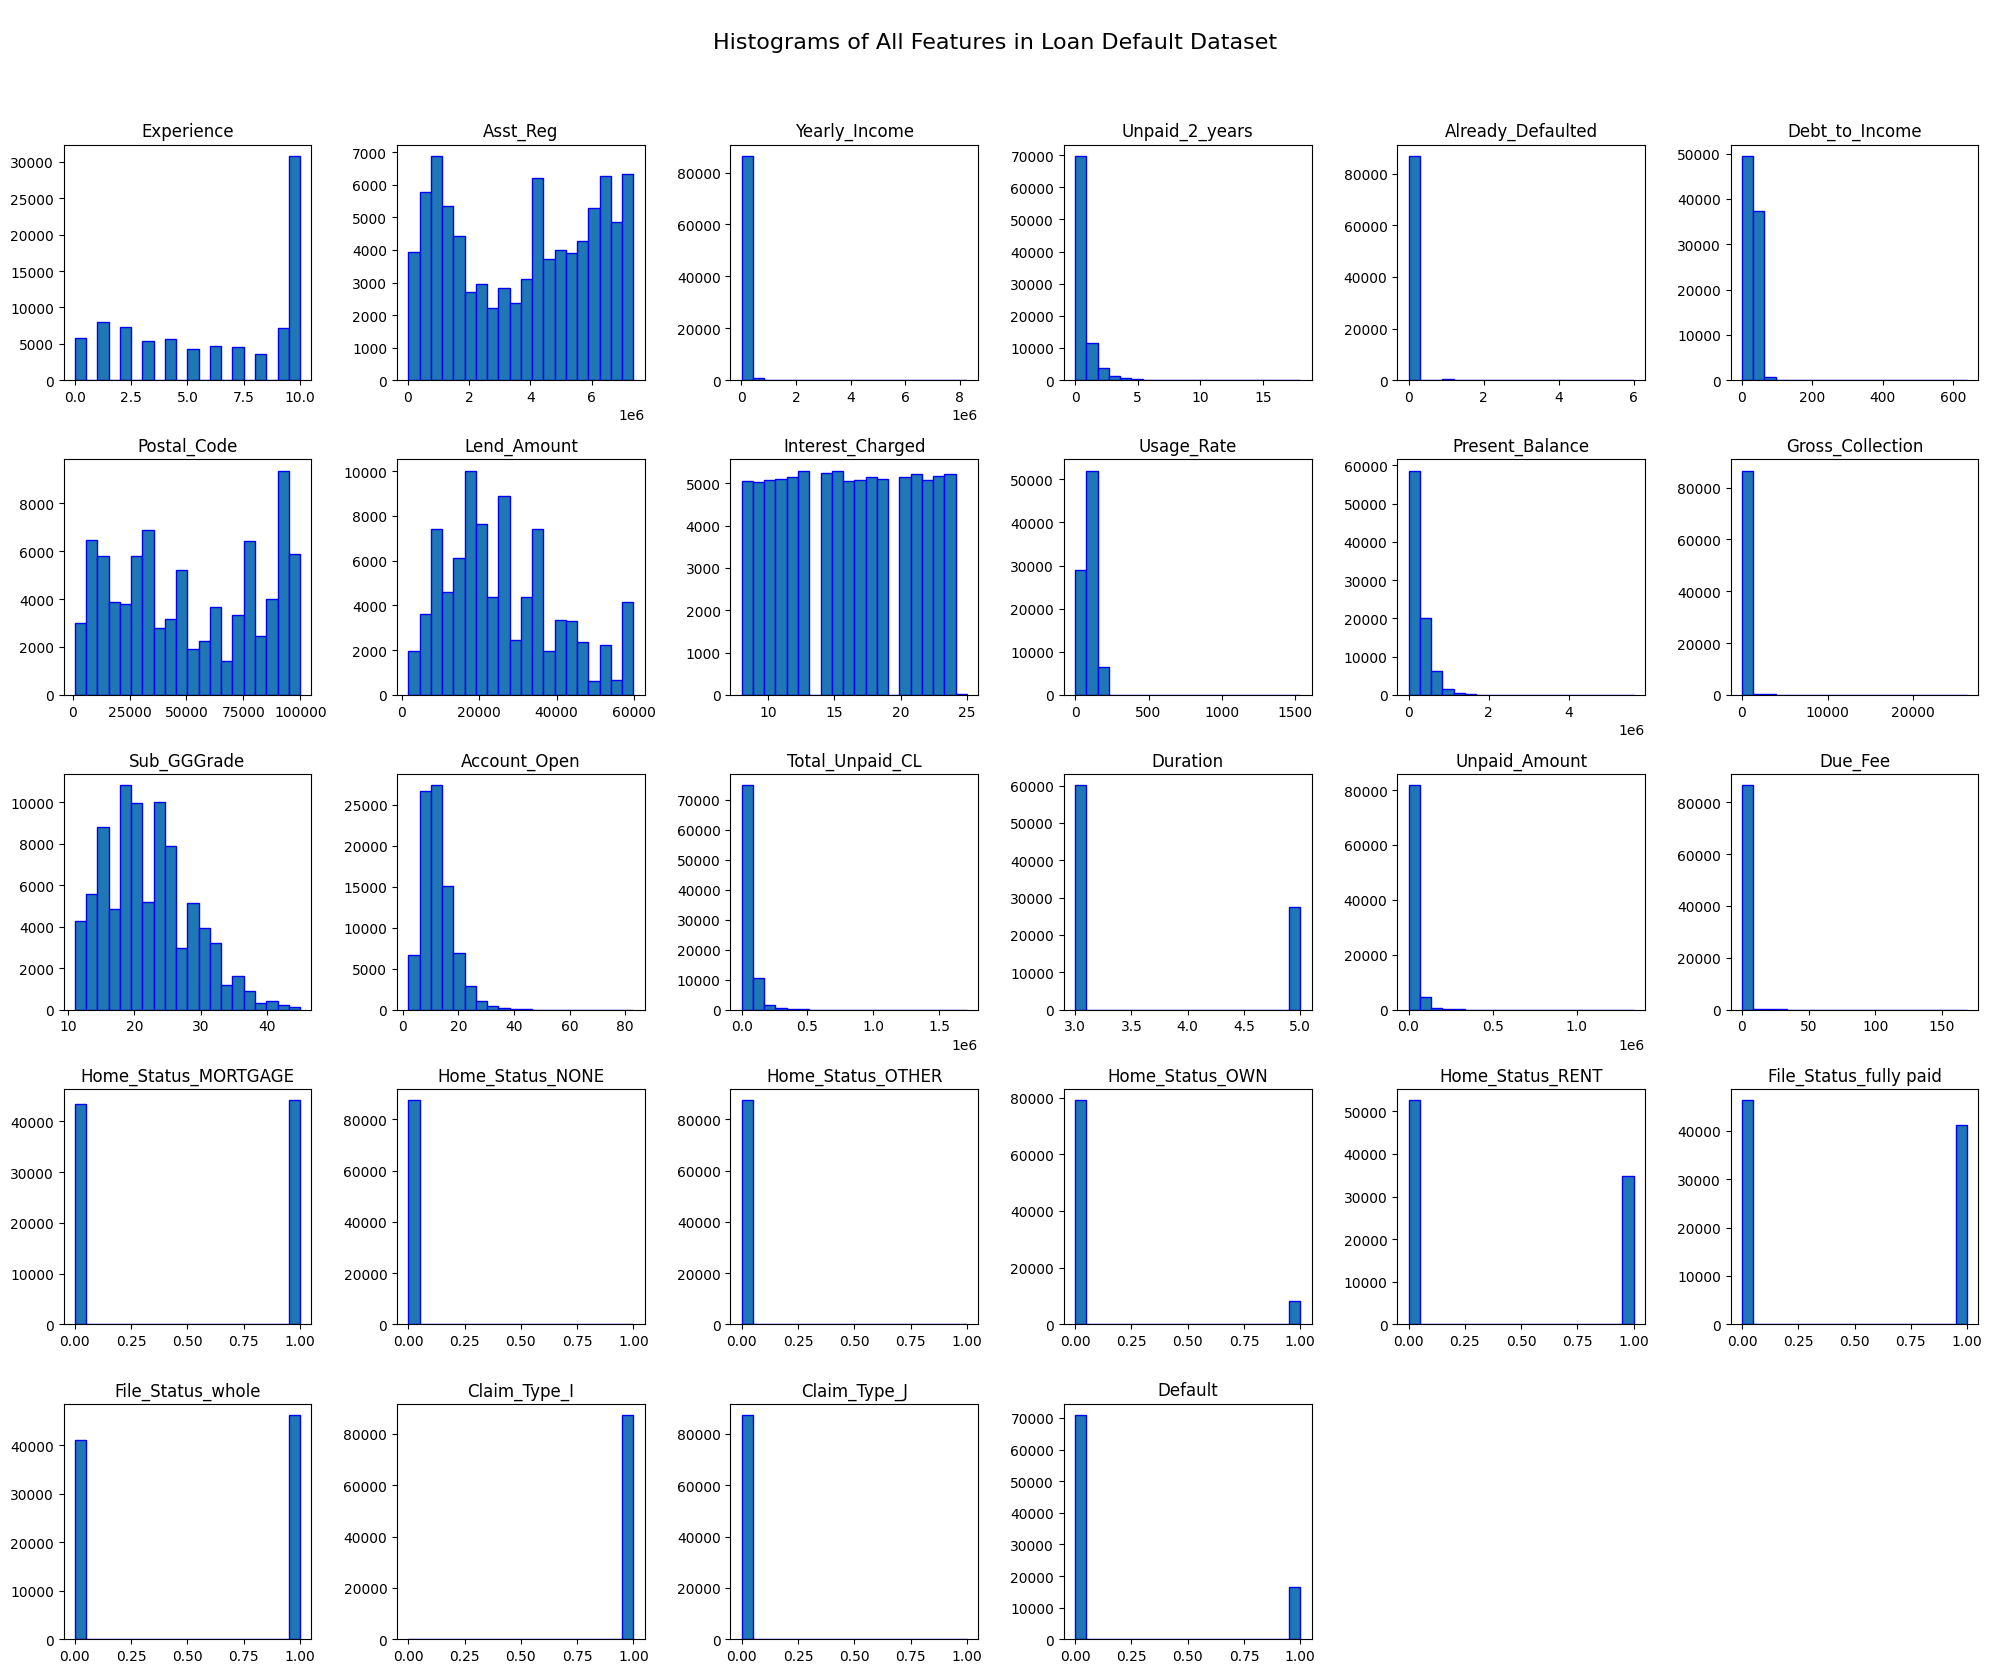

In [279]:
fig = loan_default_final.iloc[:,1:40].hist(bins=20, figsize=(20, 20), layout=(6, 6), grid=False, edgecolor='b')
plt.suptitle("\nHistograms of All Features in Loan Default Dataset", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

## Conclusions:

- Are the data usable?  Yes this dataset is usable. The data is now clean, it no longer have any null values or nan values. We also got rid of duplicate values.

- Do you need to modify or correct the data in some way? Yes, we did need to impute some of the features, to drop some features and to perform Ordinal and One-hot-endcoding on the categorial features. 

- Is there any class imbalance? Yes, there is a significant class imbalance in the target column (the default column). Number of defaulting clients: 16512 - Number of good clients: 70988. This dataset is imbalanced with a defaulting class making up only 18.87% of the dataset. This can render the modelling of this dataset more challenging.

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

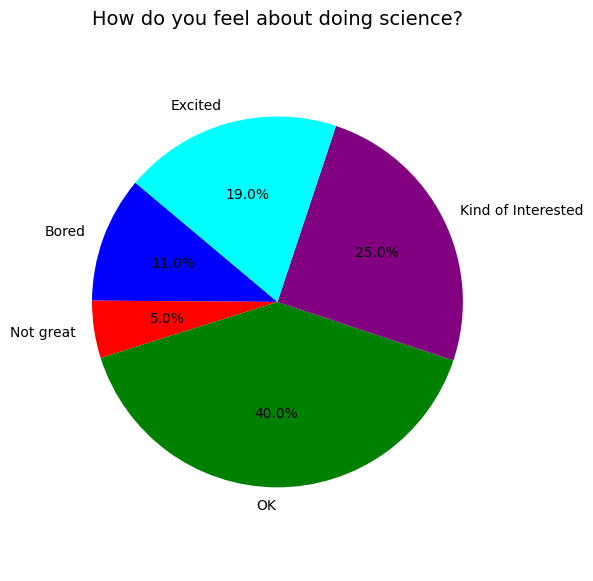

In [76]:
labels = ['Bored', 'Not great','OK','Kind of Interested','Excited']
percentages = [11, 5, 40, 25, 19]
colors = ['blue','red','green','purple','cyan']

plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("How do you feel about doing science?", fontsize=14)
plt.axis('equal') 
plt.tight_layout() 
plt.show()